ANN with identitties as activation function MSE: 226.25954230388336
ANN with identitties as activation function Score: -1417.8939577931508
MAE: 226.17979730735476
R2_SCORE : -1417.8939577931508
MSLE : 3.830528718094478
MeAE : 226.08286612654445
Mean Poisson_Deviance : 587.192238593563
R2_Score : -1417.8939577931508
Mean Absolute Percentage Error : 0.8619608521050902
D2_Absolute Error Score : -48.75142103990633
D2_Pinball_Score : -48.75142103990633
D2_Tweedie_Score : -1417.8939577931508


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


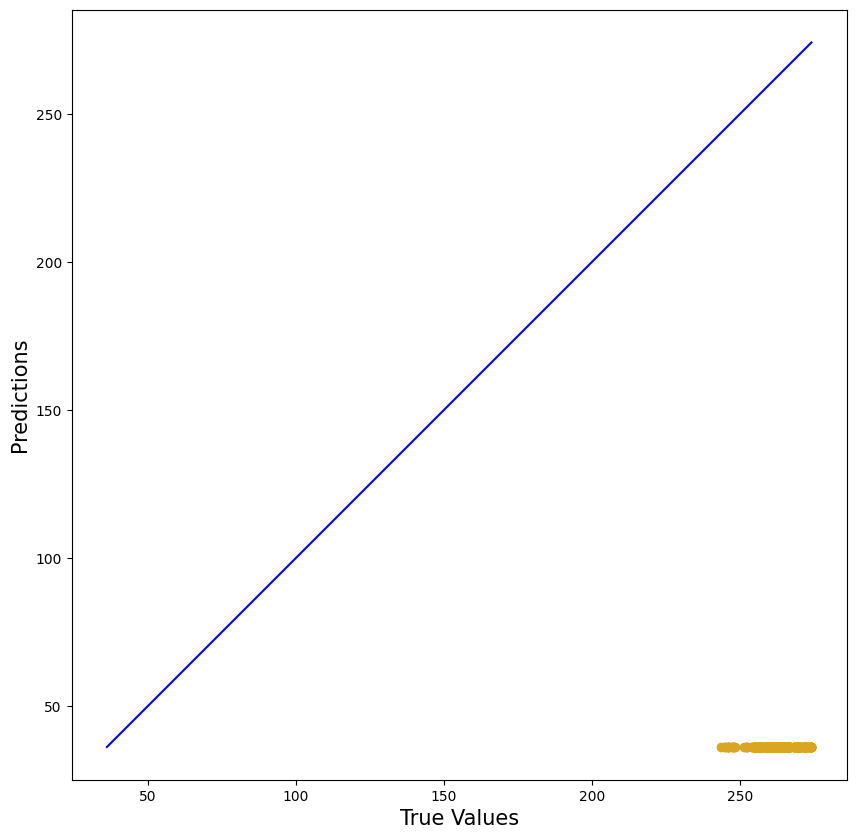

In [ ]:
import numpy as np
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LassoCV, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, accuracy_score, f1_score
from sklearn.metrics import *
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
col_names = ['Freq' ,'LnW'  ,'WinO' ,'WinT' ,'NecW', 'S']
ds = pd.read_csv('/content/cleandataset.csv')
ds2 = pd.read_csv('/content/graphplot.csv')

#print(ds)
# ds2 = pd.read_csv('/content/CSDb.csv')
#rfImplementation(ds,ds2)
#annImplementationrelu(ds,ds2)
#annImplementationidentity(ds,ds2)
#annImplementationtidentity(ds)

#rfImplementation(ds , ds2)
annImplementationrelu(ds)
#annImplementationtidentity(ds)

# Dataset Generation

In [ ]:
#cleaned_db = pd.read_csv('cleandataset.csv')
import pandas as pd
final_db = pd.read_csv('final_dataset(1).csv')
#print(final_db);
list_of_column_names = []
for col in final_db.columns:
  list_of_column_names.append(col)
#print(list_of_column_names)
list_of_column_names.pop(0)
#list_of_column_names.pop(0)
i = 1
for element in list_of_column_names:
  values = element.split()
  #print(values)



  l4 = values[3]
  l5 = values[4]
  l6 = values[5]
  w4 = values[6]
  w5 = values[7]
  w6 = values[8]

  l4 = l4[4:-3]
  l5 = l5[4:-3]
  l6 = l6[4:-3]
  w4 = w4[4:-3]
  w5 = w5[4:-3]
  w6 = w6[4:8]

  # print(l4,l5,l6,w4,w5,w6)
  # lnW = lnW[4:-3]
  # winO = winO[4:-3]
  # winT = winT[4:-3]
  # necW = necW[4:-3]

  total = 0

  #print(final_db.iloc[1,1])
  for row in range(1,50):
    total += final_db.iloc[row , i]

  # for row in range(81,119):
  #   total += final_db.iloc[row , i]

  # for row in range(382,461):
  #   total += final_db.iloc[row , i]
  #print(total)

  data = {
        # 'Freq': [freq],

        'l4':[l4],
        'l5':[l5],
        'l6':[l6],
        'w4':[w4],
        'w5':[w5],
        'w6':[w6],
        'FOM':[-1*total],

    }


  df = pd.DataFrame(data)
  # print(df)
  df.to_csv('cleandataset.csv', mode='a', index=False, header=False)
  i = i+1


  # for row in range(len(final_db)):
  #   freq = final_db.iloc[row,0]
  #   # s = final_db.iloc[row,i]
  #   s = sum(row[i])


  #   data = {
  #       # 'Freq': [freq],
  #       'LnW': [lnW],
  #       'WinO':[winO],
  #       'WinT':[winT],
  #       'NecW':[necW],
  #       'S':[s]
  #   }


# KNN Implemetation

In [ ]:
def knnImplementation(pi):
  X = pi.iloc[:,:-1].values
  y = pi.iloc[:, 6].values

  #print(y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
  #  scaler = StandardScaler()
  #  scaler.fit(X_train)
  #  X_train = scaler.transform(X_train)
  #  X_test = scaler.transform(X_test)
  knn = KNeighborsRegressor(n_neighbors=6)
  knn.fit(X_train, y_train)
  knn_y_pred = knn.predict(X_test)
  print("K NEAREST NEIGHBORS RESULTS")
  # print(knn_y_pred)
  error = mean_squared_error(y_test,knn_y_pred)
  # error = mean_squared_error(y_test,knn_y_pred,squared=False)
  print(f"KNN MSE: {error}")
  print(f"KNN Score: {knn.score(X_test, y_test)}")
  print(f"MAE: {mean_absolute_error(y_test,knn_y_pred)}")
  print(f"R2_SCORE : {r2_score(y_test,knn_y_pred)}")

  print(f"MSLE : {mean_squared_log_error(y_test, knn_y_pred)}")
  print(f"MeAE : {median_absolute_error(y_test, knn_y_pred)}")
  print(f"Mean Poisson_Deviance : {mean_poisson_deviance(y_test, knn_y_pred)}")
  print(f"R2_Score : {r2_score(y_test, knn_y_pred)}")
  #print(f"R2_Score : {mean_gamma_deviance(y_test, rf_y_pred)}")
  print(f"Mean Absolute Percentage Error : {mean_absolute_percentage_error(y_test, knn_y_pred)}")
  print(f"D2_Absolute Error Score : {d2_absolute_error_score(y_test, knn_y_pred)}")
  print(f"D2_Pinball_Score : {d2_pinball_score(y_test, knn_y_pred)}")
  print(f"D2_Tweedie_Score : {d2_tweedie_score(y_test, knn_y_pred)}")

  graphImplementation(y_test,knn_y_pred)

  # xtest = pi2.iloc[:,:-1].values
  # xfig = pi2.iloc[:,0].values
  # yfig = pi2.iloc[:,5].values
  #yfig2 = knn.predict(xtest)

  # plt.plot(xfig, yfig, color='r', label='True')
  # plt.plot(xfig, yfig2, color='g', label='Predicted')

  # # Naming the x-axis, y-axis and the whole graph
  # plt.xlabel("Frequency")
  # plt.ylabel("Reflection Coefficient")
  # plt.title("Plot of True and Predicted Value of KNN")

  # # Adding legend, which helps us recognize the curve according to it's color
  # plt.legend()

  # # To load the display window
  # plt.show()

  # print(r2_score(y_test,knn_y_pred))

# GPR Implementation

In [ ]:
import random
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

def gprImplementation(pi):
  X = pi.iloc[:,:-1].values
  y = pi.iloc[:, 6].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)
  # scaler = StandardScaler()
  # scaler.fit(X_train)
  # X_train = scaler.transform(X_train)
  # X_test = scaler.transform(X_test)

 #gpr = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(X, y)
  #rf_y_pred = rf.predict(X_test)
  # print(rf_y_pred)

  # xtest = pi2.iloc[:,:-1].values
  # xfig = pi2.iloc[:,0].values
  # yfig = pi2.iloc[:,5].values
  # yfig2 = rf.predict(xtest)

  # plt.plot(xfig, yfig, color='r', label='True')
  # plt.plot(xfig, yfig2, color='g', label='Predicted')

  # Naming the x-axis, y-axis and the whole graph
  # plt.xlabel("Frequency")
  # plt.ylabel("Reflection Coefficient")
  # plt.title("Plot of True and Predicted Value of GPR Regression")

  # Adding legend, which helps us recognize the curve according to it's color
  # plt.legend()

  # To load the display window
  #plt.show()
  #print("GPR RESULTS")

  ## shuffle the data

  # c = list(zip(X, y))
  # random.shuffle(c)

  # x, y = zip(*c)

  # x = np.array(x)
  # y = np.array(y)

  # # decide how many samples to take from the database for training and testing
  # n_train = 60
  # n_test = 99

  # # split data in training and test
  # # take first n_train molecules for training
  # x_train  = x[0:n_train]
  # y_train = y[0:n_train]

  # take the next n_test data for testing
  # x_test = x[n_train:n_train + n_test]
  # y_test = y[n_train:n_train + n_test]

    # Define the initial values of hyperparameters and the search bounds
  const, bound, length = 4, 1e2, 100

  # Construct the kernel
  kernel = RBF() + ConstantKernel(constant_value=2)
  gpr = GaussianProcessRegressor(kernel=kernel, alpha=5,random_state=42)

  # gpr = GaussianProcessRegressor(
  #     kernel=kernel,   # K=C*RBF
  #     alpha=0.0001,    # data noise
  #     normalize_y=True,
  #     n_restarts_optimizer=2, # random restarts for the hyperparameter search
  #     random_state=1234)

  gpr.fit(X_train, y_train)

# # This prints an exhaustive list of all settings relevant to GPR
# print(f"trained params : {gpr.get_params()}")

# # This prints the optimal hyperparameters of the kernel
# print(f"trained params : {gpr.kernel_}")

  gpr_y_pred = gpr.predict(X_test)
  print("GPR RESULTS")
  # print(knn_y_pred)
  error = mean_squared_error(y_test,gpr_y_pred)
  # error = mean_squared_error(y_test,knn_y_pred,squared=False)
  print(f"GPR MSE: {error}")
  print(f"GPR Score: {gpr.score(X_test, y_test)}")
  print(f"MAE: {mean_absolute_error(y_test,gpr_y_pred)}")
  print(f"R2_SCORE : {r2_score(y_test,gpr_y_pred)}")
  print(f"MSLE : {mean_squared_log_error(y_test, gpr_y_pred)}")
  print(f"MeAE : {median_absolute_error(y_test, gpr_y_pred)}")
  print(f"Mean Poisson_Deviance : {mean_poisson_deviance(y_test, gpr_y_pred)}")
  print(f"R2_Score : {r2_score(y_test, gpr_y_pred)}")
  #print(f"R2_Score : {mean_gamma_deviance(y_test, rf_y_pred)}")
  print(f"Mean Absolute Percentage Error : {mean_absolute_percentage_error(y_test, gpr_y_pred)}")
  print(f"D2_Absolute Error Score : {d2_absolute_error_score(y_test, gpr_y_pred)}")
  print(f"D2_Pinball_Score : {d2_pinball_score(y_test, gpr_y_pred)}")
  print(f"D2_Tweedie_Score : {d2_tweedie_score(y_test, gpr_y_pred)}")
  graphImplementation(y_test,gpr_y_pred)





In [ ]:
def annImplementationrelu(pi):
  X = pi.iloc[:,:-1].values
  y = pi.iloc[:, 6].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9,random_state=5)
  mlp = MLPRegressor(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500000)
  mlp.fit(X_train,y_train)

  # xtest = pi2.iloc[:,:-1].values
  # xfig = pi2.iloc[:,0].values
  # yfig = pi2.iloc[:,5].values
  # yfig2 = mlp.predict(xtest)

  # plt.plot(xfig, yfig, color='r', label='True')
  # plt.plot(xfig, yfig2, color='g', label='Predicted')

  # Naming the x-axis, y-axis and the whole graph
  # plt.xlabel("Frequency")
  # plt.ylabel("Reflection Coefficient")
  # plt.title("Plot of True and Predicted Values of ANN (ReLU) Regression")

  # Adding legend, which helps us recognize the curve according to it's color
  # plt.legend()



  mlp_y_pred = mlp.predict(X_test)
  error = mean_squared_error(y_test,mlp_y_pred,squared=False)
  print(f"ANN with relu as activation function  MSE: {error}")
  print(f"ANN  with relu as activation function Score: {mlp.score(X_test, y_test)}")
  print(f"MAE: {mean_absolute_error(y_test,mlp_y_pred)}")
  print(f"R2_SCORE : {r2_score(y_test,mlp_y_pred)}")

  print(f"MSLE : {mean_squared_log_error(y_test, mlp_y_pred)}")
  print(f"MeAE : {median_absolute_error(y_test, mlp_y_pred)}")
  print(f"Mean Poisson_Deviance : {mean_poisson_deviance(y_test, mlp_y_pred)}")
  print(f"R2_Score : {r2_score(y_test, mlp_y_pred)}")
  #print(f"R2_Score : {mean_gamma_deviance(y_test, rf_y_pred)}")
  print(f"Mean Absolute Percentage Error : {mean_absolute_percentage_error(y_test, mlp_y_pred)}")
  print(f"D2_Absolute Error Score : {d2_absolute_error_score(y_test, mlp_y_pred)}")
  print(f"D2_Pinball_Score : {d2_pinball_score(y_test, mlp_y_pred)}")
  print(f"D2_Tweedie_Score : {d2_tweedie_score(y_test, mlp_y_pred)}")
  graphImplementation(y_test, mlp_y_pred)

In [ ]:
def rfImplementation(pi , pi2):
  X = pi.iloc[:,:-1].values
  y = pi.iloc[:, 6].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
  # scaler = StandardScaler()
  # scaler.fit(X_train)
  # X_train = scaler.transform(X_train)
  # X_test = scaler.transform(X_test)
  rf = RandomForestRegressor(max_depth=2,n_estimators=30, min_samples_split=3,max_leaf_nodes=5,random_state=42)
  rf = RandomForestRegressor()
  rf.fit(X_train, y_train)
  rf_y_pred = rf.predict(X_test)
  # print(rf_y_pred)
  print("Random Forest RESULTS")
  error = mean_squared_error(y_test,rf_y_pred,squared=False)
  print(f"RF MSE: {error}")
  print(f"RF Score: {rf.score(X_test, y_test)}")
  print(f"MAE: {mean_absolute_error(y_test,rf_y_pred)}")
  print(f"R2_SCORE : {r2_score(y_test,rf_y_pred)}")

  print(f"MSLE : {mean_squared_log_error(y_test, rf_y_pred)}")
  print(f"MeAE : {median_absolute_error(y_test, rf_y_pred)}")
  print(f"Mean Poisson_Deviance : {mean_poisson_deviance(y_test, rf_y_pred)}")
  print(f"R2_Score : {r2_score(y_test, rf_y_pred)}")
  #print(f"R2_Score : {mean_gamma_deviance(y_test, rf_y_pred)}")
  print(f"Mean Absolute Percentage Error : {mean_absolute_percentage_error(y_test, rf_y_pred)}")
  print(f"D2_Absolute Error Score : {d2_absolute_error_score(y_test, rf_y_pred)}")
  print(f"D2_Pinball_Score : {d2_pinball_score(y_test, rf_y_pred)}")
  print(f"D2_Tweedie_Score : {d2_tweedie_score(y_test, rf_y_pred)}")




















  # matrix = confusion_matrix(y_test, rf_y_pred)
  # print(matrix)
  graphImplementation(y_test, rf_y_pred)
  #print("rf graph of actual vs predicted value")

  xfig = pi2.iloc[:, 0].values
  xTest = pi2.iloc[:,:-1].values
  yfig = pi2.iloc[:, 6].values
  yfig2 = rf.predict(xTest)

  plt.figure(figsize=(10,10))
  plt.plot(xfig, yfig, color='r', label='True FOM')
  plt.plot(xfig, yfig2, color='g', label='Predicted FOM')
  plt.ylabel("FOM")
  # plt.xlabel("Freq(GHz)")
  # plt.title("Freq v/s dB(S(1,1))")

  # # Adding legend, which helps us recognize the curve according to it's color
  # plt.legend()

  # # To load the display window
  plt.show()
  # # print(r2_score(y_test,knn_y_pred))

In [ ]:
def annImplementationtidentity(pi):
  X = pi.iloc[:,:-1].values
  y = pi.iloc[:, 6].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
  mlp = MLPRegressor(hidden_layer_sizes=(8,8,8), activation='tanh', solver='adam', max_iter=500)
  mlp.fit(X_train,y_train)

  mlp_y_pred = mlp.predict(X_test)
  error = mean_squared_error(y_test,mlp_y_pred,squared=False)
  print(f"ANN with identitties as activation function MSE: {error}")
  print(f"ANN with identitties as activation function Score: {mlp.score(X_test, y_test)}")
  print(f"MAE: {mean_absolute_error(y_test,mlp_y_pred)}")
  print(f"R2_SCORE : {r2_score(y_test,mlp_y_pred)}")

  print(f"MSLE : {mean_squared_log_error(y_test, mlp_y_pred)}")
  print(f"MeAE : {median_absolute_error(y_test, mlp_y_pred)}")
  print(f"Mean Poisson_Deviance : {mean_poisson_deviance(y_test, mlp_y_pred)}")
  print(f"R2_Score : {r2_score(y_test, mlp_y_pred)}")
  #print(f"R2_Score : {mean_gamma_deviance(y_test, rf_y_pred)}")
  print(f"Mean Absolute Percentage Error : {mean_absolute_percentage_error(y_test, mlp_y_pred)}")
  print(f"D2_Absolute Error Score : {d2_absolute_error_score(y_test, mlp_y_pred)}")
  print(f"D2_Pinball_Score : {d2_pinball_score(y_test, mlp_y_pred)}")
  print(f"D2_Tweedie_Score : {d2_tweedie_score(y_test, mlp_y_pred)}")
  graphImplementation(y_test, mlp_y_pred)

  # xtest = pi2.iloc[:,:-1].values
  # xfig = pi2.iloc[:,0].values
  # yfig = pi2.iloc[:,5].values
  # yfig2 = mlp.predict(xtest)

  # plt.plot(xfig, yfig, color='r', label='True')
  # plt.plot(xfig, yfig2, color='g', label='Predicted')

  # # Naming the x-axis, y-axis and the whole graph
  # plt.xlabel("Frequency")
  # plt.ylabel("Reflection Coefficient")
  # plt.title("Plot of True and Predicted Values of ANN (Identity) Regression")

  # # Adding legend, which helps us recognize the curve according to it's color
  # plt.legend()

In [ ]:
annImplementationtanh(ds)
annImplementationrelu(ds)
lassoImplementation(ds)
rfImplementation(ds)
bayesImplementation(ds)

In [ ]:

def graphImplementation(y_test, pred_y_test):
#  plt.scatter(y_test, pred_y_test)
#  plt.xlabel('True Values ')
#  plt.ylabel('Predictions ')
#  plt.axis('equal')
#  plt.axis('square')
#  plt.xlim([0, plt.xlim()])
#  plt.ylim([0, plt.ylim()])
#  _ = plt.plot([-100, 100], [-100, 100])
  plt.figure(figsize=(10,10))
  plt.scatter(y_test, pred_y_test, c='goldenrod')
  # plt.yscale('log')
  # plt.xscale('log')


  p1 = max(max(pred_y_test), max(y_test))
  p2 = min(min(pred_y_test), min(y_test))
  plt.plot([p1, p2], [p1, p2], 'b-')
  plt.xlabel('True Values', fontsize=15)
  plt.ylabel('Predictions', fontsize=15)
  plt.axis('equal')
  plt.show()